In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
path = "./data/"
books= pd.read_csv(path + "books_word2vec.csv")
users= pd.read_csv(path + "users.csv")
rating = pd.read_csv(path + "train_ratings.csv")

In [3]:
books = books.drop('Unnamed: 0', axis= 1)

location_country

In [4]:
users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거

users['location_city'] = users['location'].apply(lambda x: x.split(',')[0].strip())
users['location_state'] = users['location'].apply(lambda x: x.split(',')[1].strip())
users['location_country'] = users['location'].apply(lambda x: x.split(',')[2].strip())

users = users.replace('na', np.nan) #특수문자 제거로 n/a가 na로 바뀌게 되었습니다. 따라서 이를 컴퓨터가 인식할 수 있는 결측값으로 변환합니다.
users = users.replace('', np.nan) # 일부 경우 , , ,으로 입력된 경우가 있었으므로 이런 경우에도 결측값으로 변환합니다.

C:\Users\권은채\AppData\Local\Temp\ipykernel_14392\3844664685.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  users['location'] = users['location'].str.replace(r'[^0-9a-zA-Z:,]', '') # 특수문자 제거


In [5]:
modify_location = users[(users['location_country'].isna())&(users['location_city'].notnull())]['location_city'].values
location = users[(users['location'].str.contains('seattle'))&(users['location_country'].notnull())]['location'].value_counts().index[0]

location_list = []
for location in modify_location:
    try:
        right_location = users[(users['location'].str.contains(location))&(users['location_country'].notnull())]['location'].value_counts().index[0]
        location_list.append(right_location)
    except:
        pass

for location in location_list:
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_state'] = location.split(',')[1]
    users.loc[users[users['location_city']==location.split(',')[0]].index,'location_country'] = location.split(',')[2]

In [7]:
users = users.drop(['location', 'location_city', 'location_state'], axis= 1)
users

,user_id,age,location_country
0,8,NaN,canada
1,11400,49.0,canada
2,11676,NaN,NaN
3,67544,30.0,canada
4,85526,36.0,canada
...,...,...,...
68087,278376,54.0,usa
68088,278621,74.0,canada
68089,278636,NaN,usa
68090,278659,33.0,canada


In [ ]:
#users.to_csv("users_country.csv", index= False)

나이대 맵핑

In [8]:
# 나이대 맵핑
def age_map(x: int) -> int:
    x = int(x)
    if x < 20:
        return 1
    elif x >= 20 and x < 30:
        return 2
    elif x >= 30 and x < 40:
        return 3
    elif x >= 40 and x < 50:
        return 4
    elif x >= 50 and x < 60:
        return 5
    else:
        return 6

In [9]:
nausers = users[users.age.isna()]
nonausers = users[users.age.isna() == False]
nonausers['age'] = nonausers['age'].apply(age_map)
users_df = pd.concat([nonausers,nausers], axis = 0).sort_index()

C:\Users\권은채\AppData\Local\Temp\ipykernel_14392\2095311996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonausers['age'] = nonausers['age'].apply(age_map)


책 최빈값

In [11]:
user_rating_df = pd.merge(users_df, rating, how='left', on='user_id')
data = pd.merge(user_rating_df, books, how='left', on='isbn')
data

,user_id,age,location_country,isbn,rating,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,8,NaN,canada,0002005018,4.0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Juvenile Fiction'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,8,NaN,canada,074322678X,4.0,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,['Fiction'],"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg
2,8,NaN,canada,0887841740,2.0,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,NaN,NaN,NaN,images/0887841740.01.THUMBZZZ.jpg
3,8,NaN,canada,1552041778,2.0,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN,images/1552041778.01.THUMBZZZ.jpg
4,8,NaN,canada,1567407781,6.0,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,NaN,NaN,NaN,images/1567407781.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315079,278376,5.0,usa,0060530103,7.0,The Grandmothers : Four Short Novels,Doris Lessing,2004.0,HarperCollins,http://images.amazon.com/images/P/0060530103.0...,NaN,NaN,NaN,images/0060530103.01.THUMBZZZ.jpg
315080,278621,6.0,canada,1550390961,8.0,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999.0,Sono Nis Press,http://images.amazon.com/images/P/1550390961.0...,en,['Poetry'],Her writings span almost the entire twentieth ...,images/1550390961.01.THUMBZZZ.jpg
315081,278636,NaN,usa,0375507299,2.0,The Snow Geese: A Story of Home,William Fiennes,2002.0,Random House,http://images.amazon.com/images/P/0375507299.0...,NaN,NaN,NaN,images/0375507299.01.THUMBZZZ.jpg
315082,278659,3.0,canada,0345330293,10.0,Town Like Alice,Nevil Shute,1981.0,Ballantine Books,http://images.amazon.com/images/P/0345330293.0...,NaN,NaN,NaN,images/0345330293.01.THUMBZZZ.jpg


In [12]:
def fillAge(idx):
    global data
    d2 = data.drop(idx, axis=0)
    d2 = d2.groupby('isbn').aggregate({"age": lambda x: pd.Series.mode(x)[0]})
    d2['age'] = d2['age'].astype(int)
    
    avg_age = {}
    for i, isbn in data.loc[idx,'isbn'].items():
        try: 
            avg_age[i] = d2.loc[isbn, 'age']
        except:
            pass
        
    avg_age = pd.DataFrame(avg_age, index=[0]).T
    avg_age.rename(columns={0:"modeAge"}, inplace=True)
    return avg_age

In [13]:
age_na_idx = data[data['age'].isna()].index
a = fillAge(age_na_idx)
data.loc[a.index, 'age'] = a['modeAge'].apply(lambda x: x)

In [14]:
def make_user_csv():
    ucpy = users_df.copy(deep=True)
    t = data[['user_id','age']]
    idx = t['age'].dropna().index
    t = t.loc[idx]
    t = t.groupby('user_id').aggregate({"age":lambda x: pd.Series.mode(x)[0]}).squeeze()
    ucpy['user_id2'] = ucpy['user_id'].copy()
    a = ucpy[['user_id', 'user_id2']].set_index('user_id2').squeeze()
    a = a.map(t).reset_index()
    a.columns = ['user_id','age']
    ucpy['age'] = a['age']
    ucpy.drop(columns = 'user_id2', inplace=True)
    return ucpy

ucpy = make_user_csv()

In [15]:
ucpy.age.value_counts()

3.0    19524
2.0    17452
4.0     8878
5.0     5823
1.0     5097
6.0     2798
Name: age, dtype: int64

In [16]:
ucpy.isna().sum()

user_id                0
age                 8520
location_country     271
dtype: int64

국가별 나이 최빈값

In [19]:
coun_age = nonausers.groupby('location_country')['age'].agg( lambda x: pd.Series.mode(x)[0])
us = pd.merge(users_df, coun_age, how='left', on='location_country')
us['age'] = us.age_x.fillna(us.age_y)
us = us[['user_id', 'age', 'location_country']]
us

,user_id,age,location_country
0,8,2.0,canada
1,11400,4.0,canada
2,11676,NaN,NaN
3,67544,3.0,canada
4,85526,3.0,canada
...,...,...,...
68087,278376,5.0,usa
68088,278621,6.0,canada
68089,278636,3.0,usa
68090,278659,3.0,canada


In [21]:
us.age.value_counts()

3.0    31149
2.0    18186
4.0     6889
5.0     4974
1.0     4066
6.0     2599
Name: age, dtype: int64

책 최빈값 -> 국가별 최빈값

In [22]:
users_bc = pd.merge(ucpy, us, how='left', on=['user_id', 'location_country'])
users_bc['age'] = users_bc.age_x.fillna(users_bc.age_y)
users_bc = users_bc[['user_id', 'age', 'location_country']]
users_bc

,user_id,age,location_country
0,8,2.0,canada
1,11400,4.0,canada
2,11676,3.0,NaN
3,67544,3.0,canada
4,85526,3.0,canada
...,...,...,...
68087,278376,5.0,usa
68088,278621,6.0,canada
68089,278636,3.0,usa
68090,278659,3.0,canada


In [23]:
users_bc[users_bc.age.isna()]

,user_id,age,location_country
2962,22255,NaN,palau
5166,219703,NaN,NaN
13060,20082,NaN,tdzimi
13980,49180,NaN,ca
14012,171467,NaN,NaN
...,...,...,...
64295,238502,NaN,benin
64856,136714,NaN,usanow
65870,169404,NaN,usacurrentlylivinginengland
65876,169612,NaN,us


In [24]:
users_bc.age.loc[users_bc.age.isna()] = 3

In [27]:
users_bc.age.value_counts()

3.0    25226
2.0    20251
4.0     8887
5.0     5826
1.0     5104
6.0     2798
Name: age, dtype: int64

<AxesSubplot: xlabel='user_count', ylabel='location_country'>

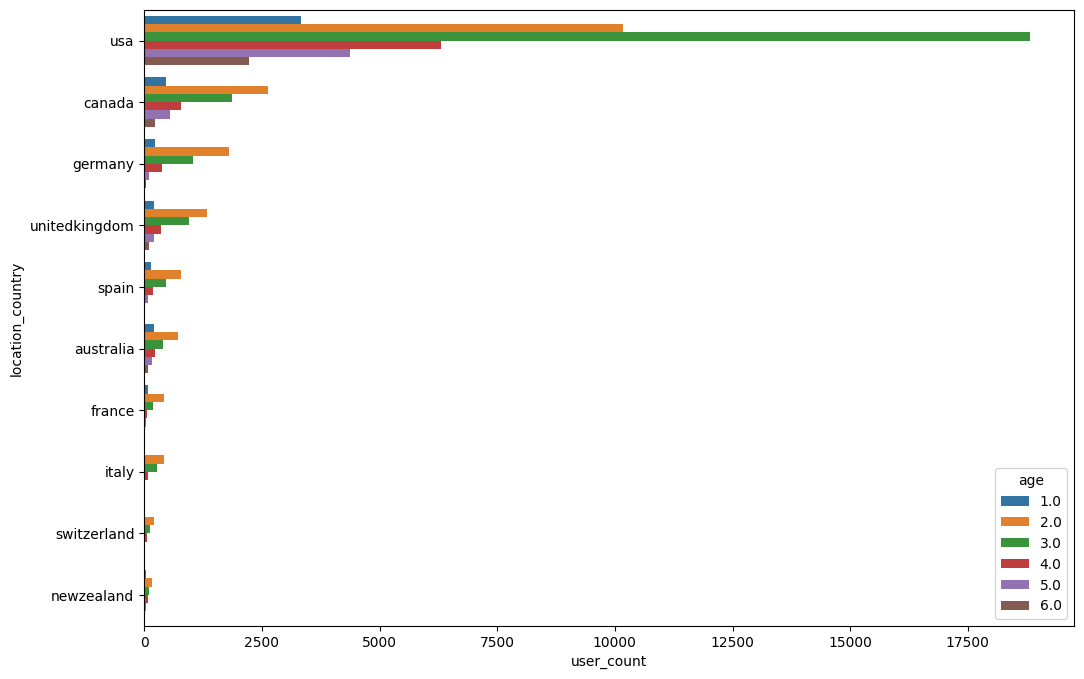

In [28]:
country = users_bc.groupby('location_country').count()['user_id'].sort_values(ascending=False)[:10]

m = pd.DataFrame()
for c in country.index:
    m = pd.concat([m, users_bc[users_bc['location_country']==c]], axis=0)
m.rename(columns={'user_id':'user_count'}, inplace=True)
m = m.groupby(["location_country", "age"]).count()['user_count'].reset_index().sort_values(by='user_count', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(data=m, x='user_count', y='location_country', hue='age', orient='h', errorbar=None)

In [ ]:
#users_bc.to_csv("users_fillage.csv", index = False)